# 키워드 정리 Test

## API 키워드 전처리

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/크롤링/키워드 분석

/content/drive/MyDrive/크롤링/키워드 분석


In [ ]:
!pwd

/content/drive/MyDrive/크롤링/키워드 분석


In [ ]:
!ls

Category0_search.csv   pandas_crawling.ipynb  signaturehelper.py
Category0_search.xlsx  __pycache__	      테스트.py


In [ ]:
category1 = pd.read_excel("/content/drive/MyDrive/크롤링/키워드 분석/Category0_search.xlsx",sheet_name="카테고리 항목들 수집",header=None)

In [ ]:
category1.to_csv("/content/drive/MyDrive/크롤링/키워드 분석/Category0_search.csv")

In [ ]:
category1 = pd.read_csv("/content/drive/MyDrive/크롤링/키워드 분석/Category0_search.csv").T
category1.drop("Unnamed: 0", axis = 0 ,inplace =True)

In [ ]:
lsts = category1.iloc[0].to_numpy()  # Series를 numpy array 변환
fixed_len = 5-len(lsts) % 5 # 5열을 맞추기 위해 남는 수 유추
lsts = np.pad(lsts,(0,fixed_len),'constant',constant_values=None) # API 키워드 넣을때 ? : 5 shape 맞추기 위한 전처리
new_lsts = lsts.reshape(-1,5)
new_lsts

array([['니트/스웨터', '카디건', '원피스', '티셔츠', '블라우스/셔츠'],
       ['점퍼', '재킷', '코트', '바지', '청바지'],
       ['스커트', '레깅스', '트레이닝복', '조끼', '정장세트'],
       ['한복', '유니폼/단체복', '파티복', '레인코트', '점프슈트'],
       ['코디세트', '브라', '팬티', '브라팬티세트', '잠옷/홈웨어'],
       ['시즌성내의', '보정속옷', '슬립', '러닝/캐미솔', '속치마/속바지'],
       ['언더웨어소품', '니트/스웨터', '티셔츠', '셔츠/남방', '카디건'],
       ['점퍼', '재킷', '코트', '청바지', '바지'],
       ['조끼', '정장세트', '트레이닝복', '한복', '유니폼/단체복'],
       ['레인코트', '코디세트', '점프슈트', '팬티', '러닝'],
       ['러닝팬티세트', '잠옷/홈웨어', '시즌성내의', '보정속옷', None]], dtype=object)

In [ ]:
new_lsts.shape

(11, 5)

## 네이버 API

In [ ]:
# test cell
import time
import requests
import signaturehelper

def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = signaturehelper.Signature.generate(timestamp, method, uri, SECRET_KEY)
    return {'Content-Type': 'application/json; charset=UTF-8',
            'X-Timestamp': timestamp,
            'X-API-KEY': API_KEY,
            'X-Customer': str(CUSTOMER_ID),
            'X-Signature': signature}

API_KEY = '01000000004031c42277f90c7fdcbd2130a4916b0aecf181b89b3543abab0f90b463c42821'
SECRET_KEY = 'AQAAAABAMcQid/kMf9y9ITCkkWsKnGbFkehYuYSpmb3ygOH/tg=='
CUSTOMER_ID = '3003237'
BASE_URL =  'https://api.naver.com'

uri = '/keywordstool'
method = 'GET'
query = {
    "siteId" : "",
    "biztpId" : "",
    "hintKeywords":   new_lsts[0],
    "event": "",
    "month": "",
    "showDetail": "1"
}
response = requests.get(BASE_URL + uri ,
                        params=query,
                        headers=get_header(
                        method=method,
                        uri=uri,
                        api_key= API_KEY,
                        secret_key= SECRET_KEY,
                        customer_id= CUSTOMER_ID))
r_data = response.json()
keywordList = r_data['keywordList']
main_keywordList = keywordList[:5]

for idx,key in enumerate(main_keywordList):
    pcCnt = key["monthlyPcQcCnt"]
    mobileCnt = key["monthlyMobileQcCnt"]

    print(f"Pc 검색량 : {pcCnt}  \t  Mobile 검색량 : {mobileCnt}")



Pc 검색량 : 5900  	  Mobile 검색량 : 31500
Pc 검색량 : 770  	  Mobile 검색량 : 2760
Pc 검색량 : 77300  	  Mobile 검색량 : 480100
Pc 검색량 : < 10  	  Mobile 검색량 : < 10
Pc 검색량 : < 10  	  Mobile 검색량 : 40


In [ ]:
# 키워드 분석_version(1.0.2)
import time
import requests
import signaturehelper
from bs4 import BeautifulSoup
import openpyxl


def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = signaturehelper.Signature.generate(timestamp, method, uri, SECRET_KEY)
    return {'Content-Type': 'application/json; charset=UTF-8',
            'X-Timestamp': timestamp,
            'X-API-KEY': API_KEY,
            'X-Customer': str(CUSTOMER_ID),
            'X-Signature': signature}

API_KEY = '01000000004031c42277f90c7fdcbd2130a4916b0aecf181b89b3543abab0f90b463c42821'
SECRET_KEY = 'AQAAAABAMcQid/kMf9y9ITCkkWsKnGbFkehYuYSpmb3ygOH/tg=='
CUSTOMER_ID = '3003237'
BASE_URL =  'https://api.naver.com'

cnt = 0
n_cnt = 0

# 네이버 API
for idx,new_lst in enumerate(new_lsts):
    uri = '/keywordstool'
    method = 'GET'
    query = {
        "siteId" : "",
        "biztpId" : "",
        "hintKeywords": new_lst,
        "event": "",
        "month": "",
        "showDetail": "1"
    }
    response_api = requests.get(BASE_URL + uri ,
                            params=query,
                            headers=get_header(
                                method=method,
                                uri=uri,
                                api_key= API_KEY,
                                secret_key= SECRET_KEY,
                                customer_id= CUSTOMER_ID))
    r_data = response_api.json()
    keywordList = r_data['keywordList']
    main_keywordList = keywordList[:5]

    for idx,key in enumerate(main_keywordList):

        # 쇼핑몰 스토어 수
        url = f"https://search.shopping.naver.com/search/all?query={key['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
        response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
        html = response_shopping.text
        soup = BeautifulSoup(html,"html.parser")
        total_num = soup.select(".subFilter_num__S9sle")[0].text.replace(",","")

        try :
            pcCnt = float(key["monthlyPcQcCnt"])
            mobileCnt = float(key["monthlyMobileQcCnt"])
            totalCnt = pcCnt + mobileCnt
            print(f"관련 키워드 : {key['relKeyword']}  \t  총 검색량 : {totalCnt} \t  총 스토어 수 {total_num}")
            cnt += 1
        except :
            print("검색량 10개 이하")
            n_cnt += 1

print(f"count : {cnt}  |  Uncount : {n_cnt}")


# print("관련 키: ", keywordList[0]['relKeyword'] )
# print("월간 검색수_PC: ",keywordList[0]['monthlyPcQcCnt'] )
# print("월간 검색수_Mobile: ",keywordList[0]['monthlyMobileQcCnt'] )
# print("월 평균 클릭수_PC: ",keywordList[0]['monthlyAvePcClkCnt'] )
# print("월 평균 클릭수_Mobile",keywordList[0]['monthlyAveMobileClkCnt'] )
# print("월 평균 클릭률_PC: ",keywordList[0]['monthlyAvePcCtr'] )
# print("월 평균 클릭수_Mobile: ",keywordList[0]['monthlyAveMobileCtr'] )
# print("경쟁정도: ",keywordList[0]['plAvgDepth'] )
# print("월평균 노출 광고수: ",keywordList[0]['compIdx'] )

관련 키워드 : 티셔츠  	  총 검색량 : 37780.0 	  총 스토어 수 66293255
관련 키워드 : 카디건  	  총 검색량 : 3120.0 	  총 스토어 수 9458468
관련 키워드 : 원피스  	  총 검색량 : 556000.0 	  총 스토어 수 28541537
검색량 10개 이하
검색량 10개 이하
관련 키워드 : 청바지  	  총 검색량 : 64490.0 	  총 스토어 수 12880245
관련 키워드 : 바지  	  총 검색량 : 27960.0 	  총 스토어 수 46657290
관련 키워드 : 재킷  	  총 검색량 : 3300.0 	  총 스토어 수 25334738
관련 키워드 : 코트  	  총 검색량 : 20930.0 	  총 스토어 수 10743296
관련 키워드 : 점퍼  	  총 검색량 : 14510.0 	  총 스토어 수 10321338
관련 키워드 : 레깅스  	  총 검색량 : 35050.0 	  총 스토어 수 4532565
관련 키워드 : 트레이닝복  	  총 검색량 : 20120.0 	  총 스토어 수 10235351
관련 키워드 : 조끼  	  총 검색량 : 23570.0 	  총 스토어 수 11694168
관련 키워드 : 스커트  	  총 검색량 : 26150.0 	  총 스토어 수 16139946
관련 키워드 : 정장세트  	  총 검색량 : 2320.0 	  총 스토어 수 2160274
관련 키워드 : 파티복  	  총 검색량 : 1520.0 	  총 스토어 수 2246040
관련 키워드 : 한복  	  총 검색량 : 76700.0 	  총 스토어 수 1036894
관련 키워드 : 레인코트  	  총 검색량 : 11200.0 	  총 스토어 수 1680225
관련 키워드 : 점프슈트  	  총 검색량 : 14150.0 	  총 스토어 수 1973925
검색량 10개 이하
관련 키워드 : 브라  	  총 검색량 : 31700.0 	  총 스토어 수 7416906
관련 키워드 : 브라팬티세트  	  총 검색량 

In [ ]:
# 키워드 분석_version(1.0.3)
import time
import requests
import signaturehelper
from bs4 import BeautifulSoup
import openpyxl
from tqdm import tqdm


def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = signaturehelper.Signature.generate(timestamp, method, uri, SECRET_KEY)
    return {'Content-Type': 'application/json; charset=UTF-8',
            'X-Timestamp': timestamp,
            'X-API-KEY': API_KEY,
            'X-Customer': str(CUSTOMER_ID),
            'X-Signature': signature}

API_KEY = '01000000004031c42277f90c7fdcbd2130a4916b0aecf181b89b3543abab0f90b463c42821'
SECRET_KEY = 'AQAAAABAMcQid/kMf9y9ITCkkWsKnGbFkehYuYSpmb3ygOH/tg=='
CUSTOMER_ID = '3003237'
BASE_URL =  'https://api.naver.com'

cnt = 0
n_cnt = 0

# 네이버 API

analysis_data = pd.DataFrame(columns=["relative_keyword","total_search","total_store_count","competitive_rate"])
for idx,new_lst in tqdm(enumerate(new_lsts)):
    uri = '/keywordstool'
    method = 'GET'
    query = {
        "siteId" : "",
        "biztpId" : "",
        "hintKeywords": new_lst,
        "event": "",
        "month": "",
        "showDetail": "1"
    }
    response_api = requests.get(BASE_URL + uri ,
                            params=query,
                            headers=get_header(
                                method=method,
                                uri=uri,
                                api_key= API_KEY,
                                secret_key= SECRET_KEY,
                                customer_id= CUSTOMER_ID))
    r_data = response_api.json()
    keywordList = r_data['keywordList']
    main_keywordList = keywordList[:5]

    for idx,key in enumerate(main_keywordList):

        # 쇼핑몰 스토어 수
        url = f"https://search.shopping.naver.com/search/all?query={key['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
        response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
        html = response_shopping.text
        soup = BeautifulSoup(html,"html.parser")
        total_num = float(soup.select(".subFilter_num__S9sle")[0].text.replace(",",""))

        try :
            pcCnt = float(key["monthlyPcQcCnt"])
            mobileCnt = float(key["monthlyMobileQcCnt"])
            totalCnt = pcCnt + mobileCnt
            competive_rate = np.around(total_num/totalCnt,2)

            # DataFrame 형태 만들기
            tmp = pd.DataFrame({"relative_keyword":[key['relKeyword']],"total_search":[totalCnt],"total_store_count":[total_num],"competitive_rate":[competive_rate]})
            analysis_data = pd.concat([analysis_data,tmp],axis=0)
            # print(f"관련 키워드 : {key['relKeyword']}  \t  총 검색량 : {totalCnt} \t  총 스토어 수 {total_num}")
            cnt += 1
        except :
            n_cnt += 1

print(f"\ncount : {cnt}  |  Uncount : {n_cnt}")


# print("관련 키: ", keywordList[0]['relKeyword'] )
# print("월간 검색수_PC: ",keywordList[0]['monthlyPcQcCnt'] )
# print("월간 검색수_Mobile: ",keywordList[0]['monthlyMobileQcCnt'] )
# print("월 평균 클릭수_PC: ",keywordList[0]['monthlyAvePcClkCnt'] )
# print("월 평균 클릭수_Mobile",keywordList[0]['monthlyAveMobileClkCnt'] )
# print("월 평균 클릭률_PC: ",keywordList[0]['monthlyAvePcCtr'] )
# print("월 평균 클릭수_Mobile: ",keywordList[0]['monthlyAveMobileCtr'] )
# print("경쟁정도: ",keywordList[0]['plAvgDepth'] )
# print("월평균 노출 광고수: ",keywordList[0]['compIdx'] )

11it [02:09, 11.74s/it]

count : 41  |  Uncount : 14


In [ ]:
analysis_data.index = np.arange(1,analysis_data.shape[0]+1)
analysis_data

,relative_keyword,total_search,total_store_count,competitive_rate
1,티셔츠,37780.0,66293532.0,1754.73
2,카디건,3120.0,9458468.0,3031.56
3,원피스,556000.0,28541777.0,51.33
4,청바지,64490.0,12880442.0,199.73
5,바지,27960.0,46657487.0,1668.72
6,재킷,3300.0,25335671.0,7677.48
7,코트,20930.0,10743624.0,513.31
8,점퍼,14510.0,10321825.0,711.36
9,레깅스,35050.0,4532573.0,129.32
10,트레이닝복,20120.0,10235560.0,508.73


# **대표 키워드 정리**

## 모든 category 엑셀 합치고 전처리

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/크롤링/키워드 분석

/content/drive/MyDrive/크롤링/키워드 분석


In [4]:
!pwd

/content/drive/MyDrive/크롤링/키워드 분석


In [5]:
!ls

Category0_search.csv   __pycache__		    테스트.py
Category0_search.xlsx  signaturehelper.py
pandas_crawling.ipynb  대표카테고리_키워드정리.csv


In [ ]:
# category 모두 불러오고 csv 파일 만들기
for i in range(12):
  #globals()는 파이썬 내장 함수로, 현재 전역 심볼 테이블을 나타내는 딕셔너리를 반환
  globals()[f"category{i}"] = pd.read_excel(f"/content/drive/MyDrive/크롤링/네이버쇼핑몰크롤링/Category{i}_search.xlsx",sheet_name="카테고리 항목들 수집",header=None)
  globals()[f"category{i}"].to_csv(f"/content/drive/MyDrive/크롤링/네이버쇼핑몰크롤링/Category{i}_search.csv")

In [ ]:
# category들 전처리
for i in range(12):
  globals()[f"category{i}"] = pd.read_csv(f"/content/drive/MyDrive/크롤링/네이버쇼핑몰크롤링/Category{i}_search.csv").T
  globals()[f"category{i}"].drop("Unnamed: 0", axis = 0 ,inplace =True)

In [ ]:
lsts = np.array([])
for i in range(12):
  tmp = globals()[f"category{i}"].iloc[0].to_numpy()  # Series를 numpy array 변환
  lsts = np.concatenate((lsts,tmp))

In [ ]:
# 띄어쓰기 and "/" 제외  -> 제외 안하면 검색 할 떄 invalid 뜸
fixed_lsts = []
for lst in lsts :
  items = lst.split('/')
  item  = [item.replace(" ","") for item in items]
  fixed_lsts.extend(item)
fixed_lsts = np.array(fixed_lsts)
fixed_lsts.shape


(2539,)

In [ ]:
fixed_len = 5-len(lsts) % 5 # 5열을 맞추기 위해 남는 수 유추
new_lsts = np.pad(fixed_lsts,(0,fixed_len),'constant',constant_values=None) # API 키워드 넣을때 ? : 5 shape 맞추기 위한 전처리
new_lsts.shape

(2540,)

In [ ]:
new_lsts = new_lsts.reshape(-1,5)
new_lsts.shape

(508, 5)

In [ ]:
pd.set_option('display.max_rows',None)
pd.DataFrame(new_lsts)

,0,1,2,3,4
0,니트,스웨터,카디건,원피스,티셔츠
1,블라우스,셔츠,점퍼,재킷,코트
2,바지,청바지,스커트,레깅스,트레이닝복
3,조끼,정장세트,한복,유니폼,단체복
4,파티복,레인코트,점프슈트,코디세트,브라
5,팬티,브라팬티세트,잠옷,홈웨어,시즌성내의
6,보정속옷,슬립,러닝,캐미솔,속치마
7,속바지,언더웨어소품,니트,스웨터,티셔츠
8,셔츠,남방,카디건,점퍼,재킷
9,코트,청바지,바지,조끼,정장세트


In [ ]:
# 키워드 분석_version(1.2.0)
import time
import requests
import signaturehelper
from bs4 import BeautifulSoup
import openpyxl
from tqdm import tqdm


def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = signaturehelper.Signature.generate(timestamp, method, uri, SECRET_KEY)
    return {'Content-Type': 'application/json; charset=UTF-8',
            'X-Timestamp': timestamp,
            'X-API-KEY': API_KEY,
            'X-Customer': str(CUSTOMER_ID),
            'X-Signature': signature}

API_KEY = '01000000004031c42277f90c7fdcbd2130a4916b0aecf181b89b3543abab0f90b463c42821'
SECRET_KEY = 'AQAAAABAMcQid/kMf9y9ITCkkWsKnGbFkehYuYSpmb3ygOH/tg=='
CUSTOMER_ID = '3003237'
BASE_URL =  'https://api.naver.com'

cnt = 0
n_cnt = 0

# 네이버 API

analysis_data = pd.DataFrame(columns=["relative_keyword","total_search","total_store_count","competitive_rate"])
for idx, new_lst in enumerate(new_lsts):
    print(f"\n{idx} : ",end=" ")
    uri = '/keywordstool'
    method = 'GET'
    query = {
        "siteId" : "",
        "biztpId" : "",
        "hintKeywords": new_lst,
        "event": "",
        "month": "",
        "showDetail": "1"
    }
    response_api = requests.get(BASE_URL + uri ,
                            params=query,
                            headers=get_header(
                                method=method,
                                uri=uri,
                                api_key= API_KEY,
                                secret_key= SECRET_KEY,
                                customer_id= CUSTOMER_ID))
    try:   # 처음 try는 키워드의 invaild 또는 스토어 수 requests 에 실패 대응
      r_data = response_api.json()
      keywordList = r_data['keywordList']
      main_keywordList = keywordList[:5]

      for key_idx,key in enumerate(main_keywordList):

          # 쇼핑몰 스토어 수
          url = f"https://search.shopping.naver.com/search/all?query={key['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
          response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
          html = response_shopping.text
          soup = BeautifulSoup(html,"html.parser")
          total_num = float(soup.select(".subFilter_num__S9sle")[0].text.replace(",",""))

          try :
              pcCnt = float(key["monthlyPcQcCnt"])
              mobileCnt = float(key["monthlyMobileQcCnt"])
              totalCnt = pcCnt + mobileCnt
              competive_rate = np.around(total_num/totalCnt,2)

              # DataFrame 형태 만들기
              tmp = pd.DataFrame({"relative_keyword":[key['relKeyword']],"total_search":[totalCnt],"total_store_count":[total_num],"competitive_rate":[competive_rate]})
              analysis_data = pd.concat([analysis_data,tmp],axis=0)
              # print(f"관련 키워드 : {key['relKeyword']}  \t  총 검색량 : {totalCnt} \t  총 스토어 수 {total_num}")
              cnt += 1
              print(".", end= "")
          except :
            # 검색량 10개 이하 경우 생략
              print(":", end= "")
              n_cnt += 1

    except :
      for i in range(key_idx,5) :  #  key_idx를 확인해서 문제 있는 부분 부터 다시 시도
        try :
          query = {
                "siteId" : "",
                "biztpId" : "",
                "hintKeywords":   new_lst[i],
                "event": "",
                "month": "",
                "showDetail": "1"}

          response = requests.get(BASE_URL + uri ,
                        params=query,
                        headers=get_header(
                        method=method,
                        uri=uri,
                        api_key= API_KEY,
                        secret_key= SECRET_KEY,
                        customer_id= CUSTOMER_ID))

          r_data = response.json()
          keywordList = r_data['keywordList']
          main_keywordList = keywordList[0]

          # 쇼핑몰 스토어 수
          url = f"https://search.shopping.naver.com/search/all?query={main_keywordList['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
          response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
          html = response_shopping.text
          soup = BeautifulSoup(html,"html.parser")
          total_num = float(soup.select(".subFilter_num__S9sle")[0].text.replace(",",""))


          try :  # 문제있는 부분부터 다시 시작해서 10개 이하 필터링
            pcCnt = float(main_keywordList["monthlyPcQcCnt"])
            mobileCnt = float(main_keywordList["monthlyMobileQcCnt"])
            totalCnt = pcCnt + mobileCnt
            competive_rate = np.around(total_num/totalCnt,2)
            tmp = pd.DataFrame({"relative_keyword":[main_keywordList['relKeyword']],"total_search":[totalCnt],"total_store_count":[total_num],"competitive_rate":[competive_rate]})
            analysis_data = pd.concat([analysis_data,tmp],axis=0)
            cnt += 1
            print(",",end="")
          except :
              print(":",end="")
              n_cnt += 1

        except  IndexError as e:  # 문제 있는 부분은 쇼핑에 "도서" 부분으로 데이터 수집 제외
          print(" 도서 책 제외 ", end= "")
          n_cnt += 1

print(f"\nCOUNT : {cnt}  |  UNCOUNT : {n_cnt}")



0 :  .....
1 :  .....
2 :  .....
3 :  .....
4 :  .....
5 :  ....:
6 :  .....
7 :  ...:.
8 :  .....
9 :  .....
10 :  .....
11 :  ....:
12 :  ....:
13 :  .....
14 :  .....
15 :  .....
16 :  .....
17 :  .....
18 :  .....
19 :  ....:
20 :  .....
21 :  .....
22 :  .....
23 :  ....:
24 :  ...:.
25 :  ...::
26 :  .....
27 :  ....:
28 :  .....
29 :  .....
30 :  .....
31 :  .....
32 :  .....
33 :  .....
34 :  ..:..
35 :  .....
36 :  .....
37 :  .....
38 :  .:..:
39 :  .....
40 :  .....
41 :  .....
42 :  .....
43 :  .....
44 :  .....
45 :  ....:
46 :  .....
47 :  .....
48 :  ....:
49 :  .....
50 :  .....
51 :  .....
52 :  .....
53 :  .....
54 :  ...:.
55 :  .....
56 :  .....
57 :  .....
58 :  .....
59 :  .....
60 :  .....
61 :  .....
62 :  .....
63 :  .....
64 :  .....
65 :  .....
66 :  .....
67 :  ..::.
68 :  ...:.
69 :  .....
70 :  ...::
71 :  .....
72 :  ....:
73 :  ...::
74 :  ....:
75 :  ....:
76 :  ....:
77 :  .....
78 :  ..:..
79 :  .....
80 :  .....
81 :  ..:..
82 :  ....:
83 :  .....
8

In [ ]:
analysis_data.to_csv("대표카테고리_키워드정리.csv", index=False)

In [ ]:
analysis_data.index = np.arange(1,len(analysis_data)+1)
analysis_data.shape

(2260, 4)

In [ ]:
pd.set_option('display.max_row', None)
analysis_data[analysis_data["competitive_rate"]< 3]

,relative_keyword,total_search,total_store_count,competitive_rate
187,골드바,54720.0,117291.0,2.14
191,실버바,6170.0,7219.0,1.17
209,톤업크림,28440.0,68182.0,2.40
229,속눈썹영양제,46050.0,52519.0,1.14
273,남성청결제,11690.0,20050.0,1.72
377,MP3다운로드,2110.0,1722.0,0.82
440,김치냉장고,119700.0,220598.0,1.84
460,음식물처리기,134500.0,59651.0,0.44
482,탄산수제조기,11420.0,33819.0,2.96
483,업소용음식물처리기,3070.0,7088.0,2.31


# **대표 키워드 분석**

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv("/content/drive/MyDrive/크롤링/키워드 분석/대표카테고리_키워드정리.csv")
data

,relative_keyword,total_search,total_store_count,competitive_rate
0,티셔츠,37500.00,66224327.00,1765.98
1,카디건,3620.00,9626694.00,2659.31
2,원피스,560200.00,28454346.00,50.79
3,니트,43840.00,25344476.00,578.11
4,스웨터,6490.00,9319823.00,1436.03
...,...,...,...,...
2255,EBS초등,67800.00,1388.00,0.02
2256,도서,26310.00,257980.00,9.81
2257,기타,48400.00,23381154.00,483.08
2258,만화,44300.00,2686543.00,60.64


In [52]:
# relative_keyword의 중복값 제거  + None 값 제거 (5열 맞추기 위한 형식상 값)
data.drop_duplicates(["relative_keyword"],inplace=True)
data.drop(2259,axis=0,inplace=True)
data.index = np.arange(1,len(data)+1)

In [53]:
data

,relative_keyword,total_search,total_store_count,competitive_rate
1,티셔츠,37500.00,66224327.00,1765.98
2,카디건,3620.00,9626694.00,2659.31
3,원피스,560200.00,28454346.00,50.79
4,니트,43840.00,25344476.00,578.11
5,스웨터,6490.00,9319823.00,1436.03
...,...,...,...,...
1917,초등5학년,400.00,9027.00,22.57
1918,초등6학년,220.00,22114.00,100.52
1919,한글,63200.00,544289.00,8.61
1920,EBS초등,67800.00,1388.00,0.02


In [54]:
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,total_search,total_store_count,competitive_rate
count,1921.00,1921.00,1921.00
mean,26727.68,4116771.52,3338.10
std,120192.41,21132594.45,22679.54
min,20.00,18.00,0.00
25%,1560.00,103476.00,15.62
50%,8130.00,488286.00,66.74
75%,23540.00,2063890.00,364.05
max,3368800.00,467694995.00,527661.60


In [55]:
data[data['total_store_count'] == data['total_store_count'].max()]

,relative_keyword,total_search,total_store_count,competitive_rate
1894,생활,4650.00,467694995.00,100579.57


In [56]:
data[data['total_search'] == data['total_search'].max()]

,relative_keyword,total_search,total_store_count,competitive_rate
1465,영화,3368800.00,1283738.00,0.38


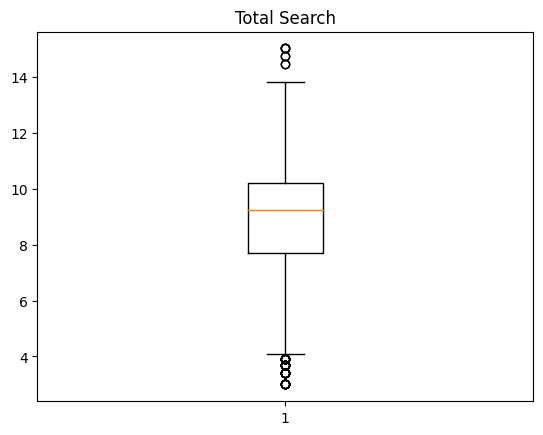

In [22]:
plt.boxplot(np.log(data['total_search']))
plt.title("Total Search");

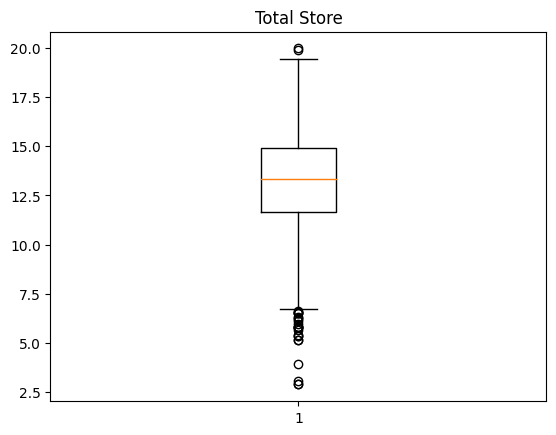

In [25]:
plt.boxplot(np.log(data['total_store_count']))
plt.title("Total Store");

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


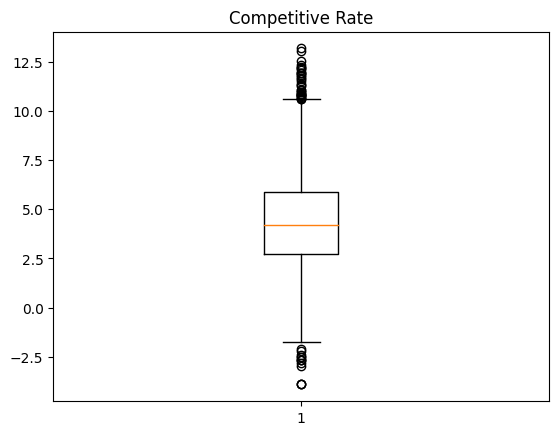

In [59]:
plt.boxplot(np.log(data['competitive_rate']))
plt.title("Competitive Rate");

In [81]:
# 백분위 나타내주는 함수
def percentile(data,per):
  percent = np.percentile(data, per)
  return percent

pd.set_option('display.max_rows',None)

# total_search는 백분위 상위 75% 이상 / total_store_count는 백분위 하위 25% 이하
new_data = data[(data["total_search"] >= percentile(data["total_search"],75)) &
                (data["total_store_count"] <= percentile(data["total_store_count"],25) )]
new_data.index = np.arange(1,len(new_data)+1)
new_data

,relative_keyword,total_search,total_store_count,competitive_rate
1,톤업크림,28440.00,68182.00,2.40
2,속눈썹영양제,46050.00,52519.00,1.14
3,여성청결제,31440.00,98072.00,3.12
4,눈썹정리기,25410.00,87718.00,3.45
5,음식물처리기,134500.00,59651.00,0.44
6,하이패스,263400.00,66271.00,0.25
7,SKT,145200.00,60815.00,0.42
8,중고폰,78100.00,48284.00,0.62
9,선불폰,24630.00,3031.00,0.12
10,전자책,30400.00,81954.00,2.70


In [82]:
# 백분위 나타내주는 함수
def percentile(data,per):
  percent = np.percentile(data, per)
  return percent

pd.set_option('display.max_rows',None)

# total_search는 백분위 상위 50% 이상 / total_store_count는 백분위 하위 50% 이하
new_data = data[(data["total_search"] >= percentile(data["total_search"],50)) &
                (data["total_store_count"] <= percentile(data["total_store_count"],50) )]
new_data.index = np.arange(1,len(new_data)+1)
new_data

,relative_keyword,total_search,total_store_count,competitive_rate
1,부티,11510.00,487286.00,42.34
2,신발끈,11910.00,265071.00,22.26
3,복대,18540.00,453778.00,24.48
4,이민,10880.00,112465.00,10.34
5,여권지갑,14830.00,297560.00,20.06
6,캐리어커버,20850.00,277754.00,13.32
7,머니클립,9550.00,300501.00,31.47
8,헌팅캡,9030.00,384379.00,42.57
9,안경줄,8290.00,151819.00,18.31
10,부채,25620.00,451835.00,17.64


In [75]:
np.percentile(data["total_search"], 75)

23540.0

#**테스트**

In [ ]:
new_lsts[442]

array(['장르소설', '테마문학', '한국소설', '비평', '창작'], dtype='<U12')

In [ ]:
# test cell
import time
import requests
import signaturehelper
from bs4 import BeautifulSoup
import openpyxl
from tqdm import tqdm


def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = signaturehelper.Signature.generate(timestamp, method, uri, SECRET_KEY)
    return {'Content-Type': 'application/json; charset=UTF-8',
            'X-Timestamp': timestamp,
            'X-API-KEY': API_KEY,
            'X-Customer': str(CUSTOMER_ID),
            'X-Signature': signature}

API_KEY = '01000000004031c42277f90c7fdcbd2130a4916b0aecf181b89b3543abab0f90b463c42821'
SECRET_KEY = 'AQAAAABAMcQid/kMf9y9ITCkkWsKnGbFkehYuYSpmb3ygOH/tg=='
CUSTOMER_ID = '3003237'
BASE_URL =  'https://api.searchad.naver.com'
problem = 441
main_keywordList = new_lsts[problem]

uri = '/keywordstool'
method = 'GET'
query = {
    "siteId" : "",
    "biztpId" : "",
    "hintKeywords":   main_keywordList,
    "event": "",
    "month": "",
    "showDetail": "1"
}
response = requests.get(BASE_URL + uri ,
                        params=query,
                        headers=get_header(
                        method=method,
                        uri=uri,
                        api_key= API_KEY,
                        secret_key= SECRET_KEY,
                        customer_id= CUSTOMER_ID))
try :
    r_data = response.json()

    keywordList = r_data['keywordList']
    main_keywordList = keywordList[:5]
    for idx,key in enumerate(main_keywordList):
        pcCnt = key["monthlyPcQcCnt"]
        mobileCnt = key["monthlyMobileQcCnt"]
        print(f"Pc 검색량 : {pcCnt}  \t  Mobile 검색량 : {mobileCnt}")
except:
    for j in range(5) :
      try :
        main_keywordList =  new_lsts[problem][j]
        query = {
              "siteId" : "",
              "biztpId" : "",
              "hintKeywords":   main_keywordList,
              "event": "",
              "month": "",
              "showDetail": "1"}
        response = requests.get(BASE_URL + uri ,
                        params=query,
                        headers=get_header(
                        method=method,
                        uri=uri,
                        api_key= API_KEY,
                        secret_key= SECRET_KEY,
                        customer_id= CUSTOMER_ID))
        r_data = response.json()

        keywordList = r_data['keywordList']
        main_keywordList = keywordList[0]


        pcCnt = main_keywordList["monthlyPcQcCnt"]
        mobileCnt = main_keywordList["monthlyMobileQcCnt"]
        print(f"Pc 검색량 : {pcCnt}  \t  Mobile 검색량 : {mobileCnt}")

      except  Exception as ex:
         print(ex)
         print('There are invalid parameters')








Pc 검색량 : 2070  	  Mobile 검색량 : 7200
Pc 검색량 : 3090  	  Mobile 검색량 : 9690
Pc 검색량 : 4670  	  Mobile 검색량 : 25300
Pc 검색량 : < 10  	  Mobile 검색량 : < 10
Pc 검색량 : 710  	  Mobile 검색량 : 2620


In [ ]:
tests = new_lsts[507]
tests

array(['EBS초등', '기타', '도서', '만화', 'None'], dtype='<U12')

In [ ]:
# 키워드 분석_version(1.2.0)
import time
import requests
import signaturehelper
from bs4 import BeautifulSoup
import openpyxl
from tqdm import tqdm


def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = signaturehelper.Signature.generate(timestamp, method, uri, SECRET_KEY)
    return {'Content-Type': 'application/json; charset=UTF-8',
            'X-Timestamp': timestamp,
            'X-API-KEY': API_KEY,
            'X-Customer': str(CUSTOMER_ID),
            'X-Signature': signature}

API_KEY = '01000000004031c42277f90c7fdcbd2130a4916b0aecf181b89b3543abab0f90b463c42821'
SECRET_KEY = 'AQAAAABAMcQid/kMf9y9ITCkkWsKnGbFkehYuYSpmb3ygOH/tg=='
CUSTOMER_ID = '3003237'
BASE_URL =  'https://api.naver.com'

cnt = 0
n_cnt = 0

# 네이버 API

analysis_data = pd.DataFrame(columns=["relative_keyword","total_search","total_store_count","competitive_rate"])
for idx, new_lst in enumerate(tests,441):  # ********여기 부분만 수정*****
    print(f"\n{idx} : ",end=" ")
    uri = '/keywordstool'
    method = 'GET'
    query = {
        "siteId" : "",
        "biztpId" : "",
        "hintKeywords": new_lst,
        "event": "",
        "month": "",
        "showDetail": "1"
    }
    response_api = requests.get(BASE_URL + uri ,
                            params=query,
                            headers=get_header(
                                method=method,
                                uri=uri,
                                api_key= API_KEY,
                                secret_key= SECRET_KEY,
                                customer_id= CUSTOMER_ID))
    try:   # 처음 try는 키워드의 invaild 또는 스토어 수 requests 에 실패 대응
      r_data = response_api.json()
      keywordList = r_data['keywordList']
      main_keywordList = keywordList[:5]

      for key_idx,key in enumerate(main_keywordList):

          # 쇼핑몰 스토어 수
          url = f"https://search.shopping.naver.com/search/all?query={key['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
          response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
          html = response_shopping.text
          soup = BeautifulSoup(html,"html.parser")
          total_num = float(soup.select(".subFilter_num__S9sle")[0].text.replace(",",""))

          try :
              pcCnt = float(key["monthlyPcQcCnt"])
              mobileCnt = float(key["monthlyMobileQcCnt"])
              totalCnt = pcCnt + mobileCnt
              competive_rate = np.around(total_num/totalCnt,2)

              # DataFrame 형태 만들기
              tmp = pd.DataFrame({"relative_keyword":[key['relKeyword']],"total_search":[totalCnt],"total_store_count":[total_num],"competitive_rate":[competive_rate]})
              analysis_data = pd.concat([analysis_data,tmp],axis=0)
              # print(f"관련 키워드 : {key['relKeyword']}  \t  총 검색량 : {totalCnt} \t  총 스토어 수 {total_num}")
              cnt += 1
              print(".", end= "")
          except :
            # 검색량 10개 이하 경우 생략
              print(":", end= "")
              n_cnt += 1

    except :
      for i in range(key_idx,5) :  #  key_idx를 확인해서 문제 있는 부분 부터 다시 시도
        try :
          query = {
                "siteId" : "",
                "biztpId" : "",
                "hintKeywords":   new_lst[i],
                "event": "",
                "month": "",
                "showDetail": "1"}

          response = requests.get(BASE_URL + uri ,
                        params=query,
                        headers=get_header(
                        method=method,
                        uri=uri,
                        api_key= API_KEY,
                        secret_key= SECRET_KEY,
                        customer_id= CUSTOMER_ID))

          r_data = response.json()
          keywordList = r_data['keywordList']
          main_keywordList = keywordList[0]
          # 쇼핑몰 스토어 수
          url = f"https://search.shopping.naver.com/search/all?query={main_keywordList['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
          response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
          html = response_shopping.text
          soup = BeautifulSoup(html,"html.parser")
          total_num = float(soup.select(".subFilter_num__S9sle")[0].text.replace(",",""))


          try :  # 문제있는 부분부터 다시 시작해서 10개 이하 필터링
            pcCnt = float(main_keywordList["monthlyPcQcCnt"])
            mobileCnt = float(main_keywordList["monthlyMobileQcCnt"])
            totalCnt = pcCnt + mobileCnt
            competive_rate = np.around(total_num/totalCnt,2)
            tmp = pd.DataFrame({"relative_keyword":[main_keywordList['relKeyword']],"total_search":[totalCnt],"total_store_count":[total_num],"competitive_rate":[competive_rate]})
            analysis_data = pd.concat([analysis_data,tmp],axis=0)
            cnt += 1
            print(",", end= "")
          except :
              print(":")
              n_cnt += 1

        except  IndexError as e:  # 문제 있는 부분은 쇼핑에 "도서" 부분으로 데이터 수집 제외
          print("\n도서 책 제외")
          n_cnt += 1


analysis_data.to_csv("대표카테고리_키워드정리.csv",index=False)
print(f"\nCOUNT : {cnt}  |  UNCOUNT : {n_cnt}")



441 :  ... , ,
442 :  
도서 책 제외
:

도서 책 제외

도서 책 제외
 ,
443 :   , , , ,
도서 책 제외

444 :  .....
445 :  . ,
도서 책 제외

도서 책 제외

도서 책 제외

446 :  . ,
도서 책 제외
 ,
도서 책 제외

447 :  . , ,
도서 책 제외

도서 책 제외

448 :  ... , ,
449 :  .....
450 :  .....
451 :  ... ,
도서 책 제외

452 :  ....
도서 책 제외

453 :  ..
도서 책 제외

도서 책 제외
 ,
454 :  .....
455 :  .
도서 책 제외
 , , ,
456 :  ...:.
457 :  .....
458 :  
도서 책 제외
 , , , ,
459 :  .....
460 :  .....
461 :  .....
462 :  .....
463 :  ....:
464 :  .....
465 :  .....
466 :  ...:.
467 :  .::..
468 :  .... ,
469 :  ..
도서 책 제외
 ,
도서 책 제외

470 :  .....
471 :  .....
472 :  .....
473 :  .....
474 :  ... ,
도서 책 제외

475 :  ..:..
476 :  .:..:
477 :  .....
478 :  ... ,
도서 책 제외

479 :  .:...
480 :  ... , ,
481 :  .....
482 :  ...
도서 책 제외
 ,
483 :  .....
484 :  ....:
485 :  ... , ,
486 :   , ,
도서 책 제외
 ,
도서 책 제외

487 :   , ,
도서 책 제외
 , ,
488 :  . ,
도서 책 제외
 ,
도서 책 제외

489 :  ...:
 ,
490 :  ...:.
491 :  .....
492 :  .....
493 :  .....
494 :  .....
495 :  .....
496 :  .....
497 :  ....

In [ ]:
# 키워드 분석_version(1.1.0)
import time
import requests
import signaturehelper
from bs4 import BeautifulSoup
import openpyxl
from tqdm import tqdm


def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = signaturehelper.Signature.generate(timestamp, method, uri, SECRET_KEY)
    return {'Content-Type': 'application/json; charset=UTF-8',
            'X-Timestamp': timestamp,
            'X-API-KEY': API_KEY,
            'X-Customer': str(CUSTOMER_ID),
            'X-Signature': signature}

API_KEY = '01000000004031c42277f90c7fdcbd2130a4916b0aecf181b89b3543abab0f90b463c42821'
SECRET_KEY = 'AQAAAABAMcQid/kMf9y9ITCkkWsKnGbFkehYuYSpmb3ygOH/tg=='
CUSTOMER_ID = '3003237'
BASE_URL =  'https://api.naver.com'

cnt = 0
n_cnt = 0

# 네이버 API

analysis_data = pd.DataFrame(columns=["relative_keyword","total_search","total_store_count","competitive_rate"])
for idx, new_lst in enumerate(tests,441):
    print(f"\n{idx} : ",end=" ")
    uri = '/keywordstool'
    method = 'GET'
    query = {
        "siteId" : "",
        "biztpId" : "",
        "hintKeywords": new_lst,
        "event": "",
        "month": "",
        "showDetail": "1"
    }
    response_api = requests.get(BASE_URL + uri ,
                            params=query,
                            headers=get_header(
                                method=method,
                                uri=uri,
                                api_key= API_KEY,
                                secret_key= SECRET_KEY,
                                customer_id= CUSTOMER_ID))
    try:   # 처음 try는 키워드의 invaild 또는 스토어 수 requests 에 실패 대응
      r_data = response_api.json()
      keywordList = r_data['keywordList']
      main_keywordList = keywordList[:5]

      for key_idx, key in enumerate(main_keywordList):
          print(key['relKeyword'], end= "")
          print(key_idx, end= "")
          # 쇼핑몰 스토어 수
          url = f"https://search.shopping.naver.com/search/all?query={key['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
          response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
          html = response_shopping.text
          soup = BeautifulSoup(html,"html.parser")
          total_num = float(soup.select(".subFilter_num__S9sle")[0].text.replace(",",""))

          try :
              pcCnt = float(key["monthlyPcQcCnt"])
              mobileCnt = float(key["monthlyMobileQcCnt"])
              totalCnt = pcCnt + mobileCnt
              competive_rate = np.around(total_num/totalCnt,2)

              # DataFrame 형태 만들기
              tmp = pd.DataFrame({"relative_keyword":[key['relKeyword']],"total_search":[totalCnt],"total_store_count":[total_num],"competitive_rate":[competive_rate]})
              analysis_data = pd.concat([analysis_data,tmp],axis=0)
              # print(f"관련 키워드 : {key['relKeyword']}  \t  총 검색량 : {totalCnt} \t  총 스토어 수 {total_num}")
              cnt += 1
              print(".")
          except :
            # 검색량 10개 이하 경우 생략
              print(":")
              n_cnt += 1
    except :
      print('')
      for i in range(key_idx,5) :  #  key_idx를 확인해서 문제 있는 부분 부터 다시 시도
        try :
          query = {
                "siteId" : "",
                "biztpId" : "",
                "hintKeywords":   new_lst[i],
                "event": "",
                "month": "",
                "showDetail": "1"}

          response = requests.get(BASE_URL + uri ,
                        params=query,
                        headers=get_header(
                        method=method,
                        uri=uri,
                        api_key= API_KEY,
                        secret_key= SECRET_KEY,
                        customer_id= CUSTOMER_ID))

          r_data = response.json()
          keywordList = r_data['keywordList']
          main_keywordList = keywordList[0]

          print(main_keywordList["relKeyword"],end="")  # *변경 사항 *
          # 쇼핑몰 스토어 수  *변경된 부분 *
          url = f"https://search.shopping.naver.com/search/all?query={main_keywordList['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
          response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
          html = response_shopping.text
          soup = BeautifulSoup(html,"html.parser")
          total_num = float(soup.select(".subFilter_num__S9sle")[0].text.replace(",",""))


          try :
            pcCnt = float(main_keywordList["monthlyPcQcCnt"])
            mobileCnt = float(main_keywordList["monthlyMobileQcCnt"])
            totalCnt = pcCnt + mobileCnt
            competive_rate = np.around(total_num/totalCnt,2)
            tmp = pd.DataFrame({"relative_keyword":[main_keywordList['relKeyword']],"total_search":[totalCnt],"total_store_count":[total_num],"competitive_rate":[competive_rate]})
            analysis_data = pd.concat([analysis_data,tmp],axis=0)
            cnt += 1
            print(" , ")
          except :
              print(":")
              n_cnt += 1

        except  IndexError as e:  # 문제 있는 부분은 쇼핑에 "도서" 부분으로 데이터 수집 제외
          print("  도서 책 제외")
          n_cnt += 1


analysis_data.to_csv("대표카테고리_키워드정리.csv",index=False)
print(f"\nCOUNT : {cnt}  |  UNCOUNT : {n_cnt}")




441 :  고전0.
문학1.
인삼2.
세계각국소설3
고전 , 
문학 , 

442 :  비평0
장르소설  도서 책 제외
테마문학:
한국소설  도서 책 제외
비평  도서 책 제외
창작 , 

COUNT : 6  |  UNCOUNT : 4


In [ ]:
# test cell
import time
import requests
import signaturehelper

def get_header(method, uri, api_key, secret_key, customer_id):
    timestamp = str(round(time.time() * 1000))
    signature = signaturehelper.Signature.generate(timestamp, method, uri, SECRET_KEY)
    return {'Content-Type': 'application/json; charset=UTF-8',
            'X-Timestamp': timestamp,
            'X-API-KEY': API_KEY,
            'X-Customer': str(CUSTOMER_ID),
            'X-Signature': signature}

API_KEY = '01000000004031c42277f90c7fdcbd2130a4916b0aecf181b89b3543abab0f90b463c42821'
SECRET_KEY = 'AQAAAABAMcQid/kMf9y9ITCkkWsKnGbFkehYuYSpmb3ygOH/tg=='
CUSTOMER_ID = '3003237'
BASE_URL =  'https://api.naver.com'

uri = '/keywordstool'
method = 'GET'
query = {
    "siteId" : "",
    "biztpId" : "",
    "hintKeywords":  "None",
    "event": "",
    "month": "",
    "showDetail": "1"
}
response = requests.get(BASE_URL + uri ,
                        params=query,
                        headers=get_header(
                        method=method,
                        uri=uri,
                        api_key= API_KEY,
                        secret_key= SECRET_KEY,
                        customer_id= CUSTOMER_ID))
r_data = response.json()
print(r_data)


{'keywordList': [{'relKeyword': 'NONE', 'monthlyPcQcCnt': 3220, 'monthlyMobileQcCnt': 7570, 'monthlyAvePcClkCnt': 0.0, 'monthlyAveMobileClkCnt': 2.0, 'monthlyAvePcCtr': 0.0, 'monthlyAveMobileCtr': 0.03, 'plAvgDepth': 3, 'compIdx': '높음'}]}


https://developers.naver.com/docs/serviceapi/datalab/shopping/shopping.md#%EC%87%BC%ED%95%91%EC%9D%B8%EC%82%AC%EC%9D%B4%ED%8A%B8-%EA%B0%9C%EC%9A%94

In [ ]:
for j in range(0,5) :
        try :
          query = {
                "siteId" : "",
                "biztpId" : "",
                "hintKeywords":   new_lst[j],
                "event": "",
                "month": "",
                "showDetail": "1"}

          response = requests.get(BASE_URL + uri ,
                        params=query,
                        headers=get_header(
                        method=method,
                        uri=uri,
                        api_key= API_KEY,
                        secret_key= SECRET_KEY,
                        customer_id= CUSTOMER_ID))

          r_data = response.json()
          keywordList = r_data['keywordList']
          main_keywordList = keywordList[0]
          print(main_keywordList)

          url = f"https://search.shopping.naver.com/search/all?query={main_keywordList['relKeyword']}%20%20%09%20%20&frm=NVSHSRC&vertical=search"
          response_shopping = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
          html = response_shopping.text
          soup = BeautifulSoup(html,"html.parser")
          total_num = float(soup.select(".subFilter_num__S9sle")[0].text.replace(",",""))


          try :
            pcCnt = float(main_keywordList["monthlyPcQcCnt"])
            mobileCnt = float(main_keywordList["monthlyMobileQcCnt"])
            totalCnt = pcCnt + mobileCnt
            competive_rate = np.around(total_num/totalCnt,2)
            tmp = pd.DataFrame({"relative_keyword":[main_keywordList['relKeyword']],"total_search":[totalCnt],"total_store_count":[total_num],"competitive_rate":[competive_rate]})
            analysis_data = pd.concat([analysis_data,tmp],axis=0)
            cnt += 1
            print(" , ")
          except :
              print(":")
              n_cnt += 1
        except  IndexError as e:
          print("  도서 책 제외")
          n_cnt += 1

{'relKeyword': '장르소설', 'monthlyPcQcCnt': 170, 'monthlyMobileQcCnt': 310, 'monthlyAvePcClkCnt': 0.6, 'monthlyAveMobileClkCnt': 3.4, 'monthlyAvePcCtr': 0.4, 'monthlyAveMobileCtr': 1.14, 'plAvgDepth': 9, 'compIdx': '중간'}
  도서 책 제외
{'relKeyword': '테마문학', 'monthlyPcQcCnt': '< 10', 'monthlyMobileQcCnt': '< 10', 'monthlyAvePcClkCnt': 0.0, 'monthlyAveMobileClkCnt': 0.0, 'monthlyAvePcCtr': 0.0, 'monthlyAveMobileCtr': 0.0, 'plAvgDepth': 0, 'compIdx': '낮음'}
:
{'relKeyword': '한국소설', 'monthlyPcQcCnt': 300, 'monthlyMobileQcCnt': 1080, 'monthlyAvePcClkCnt': 0.0, 'monthlyAveMobileClkCnt': 0.7, 'monthlyAvePcCtr': 0.0, 'monthlyAveMobileCtr': 0.07, 'plAvgDepth': 3, 'compIdx': '높음'}
  도서 책 제외
{'relKeyword': '비평', 'monthlyPcQcCnt': 2570, 'monthlyMobileQcCnt': 6590, 'monthlyAvePcClkCnt': 0.0, 'monthlyAveMobileClkCnt': 0.0, 'monthlyAvePcCtr': 0.0, 'monthlyAveMobileCtr': 0.0, 'plAvgDepth': 3, 'compIdx': '높음'}
  도서 책 제외
{'relKeyword': '창작', 'monthlyPcQcCnt': 920, 'monthlyMobileQcCnt': 1900, 'monthlyAvePcClkCnt